# [Exploring 'Game of Thrones' Battles](https://medium.com/@omkar.sunthankar/exploring-game-of-thrones-battles-and-predicting-the-fate-of-the-characters-using-machine-1fc965dc6acb)

The datasets used in this notebook can be downloaded from [Kaggle](https://www.kaggle.com/mylesoneill/game-of-thrones)

First we import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

We load the datasets using read_csv() of pandas 

In [3]:
battles_data = pd.read_csv('battles.csv')
death_data = pd.read_csv('character-deaths.csv')

We can take a look at data with head() function

In [4]:
battles_data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


describe() summarizes the frame: shows count, mean, min, max and quantiles.

In [10]:
battles_data.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [8]:
death_data.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


We use visualization libraries Seaborn and Matplotlib to answer some questions regarding data.

### Question 1 -  Which kings has fought the most battles?

In [13]:
battles_data[['name', 'attacker_king', 'defender_king']]

,name,attacker_king,defender_king
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark


Each row in battles_data frame corresponds to a battle. For each battle, the attacker, the defender, the location and some other information are provided. To find out the king who fought the most, we can count the number of occurrences of the attacker kings. We will use value_counts() which returns the counts of unique values in given column.

In [15]:
battles_data['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

Seaborn is powerful library which is able to perform transforming operations (such as counting) and visualizing the values itself. We can call countplot() with the dataframe and the relevant column to plot the number of battles the kings fought. 

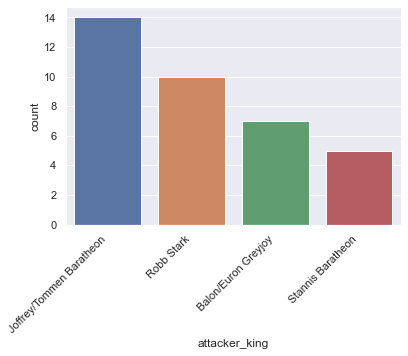

In [22]:
ax = sns.countplot(data=battles_data, x='attacker_king')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

### Question 2 - Which attacker kings have won most battles, what is their win percentage?

To answer this question, we first filter the battles where the attackers won the battle.

In [40]:
battles_data['attacker_outcome'].value_counts()

win     32
loss     5
Name: attacker_outcome, dtype: int64

In [52]:
attackers_won = battles_data[battles_data['attacker_outcome'] == 'win']

The number of the battles where the attackers won:

In [33]:
attackers_won.shape[0]

32

Next, we count the number of the battles won and fought by each attacker king and divide the number of wons to foughts to compute the percentage.

In [53]:
attackers_won['attacker_king'].value_counts() 

Joffrey/Tommen Baratheon    13
Robb Stark                   8
Balon/Euron Greyjoy          7
Stannis Baratheon            2
Name: attacker_king, dtype: int64

In [54]:
battles_data['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

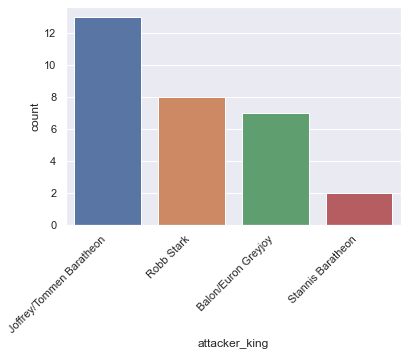

In [59]:
ax = sns.countplot(data=attackers_won, x='attacker_king')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [55]:
win_ratio = attackers_won['attacker_king'].value_counts() / battles_data['attacker_king'].value_counts() * 100
win_ratio

Joffrey/Tommen Baratheon     92.857143
Robb Stark                   80.000000
Balon/Euron Greyjoy         100.000000
Stannis Baratheon            40.000000
Name: attacker_king, dtype: float64

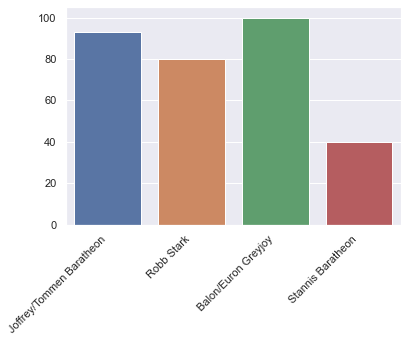

In [57]:
ax = sns.barplot(x=win_ratio.index, y=win_ratio.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

### Question 3 - The effect of army size and terrains on battle outcome.

In [64]:
battles_data['army_difference'] = battles_data['attacker_size'] - battles_data['defender_size']

In [67]:
battles_army = battles_data.dropna(subset=['army_difference', 'attacker_outcome'])

<Figure size 432x288 with 0 Axes>

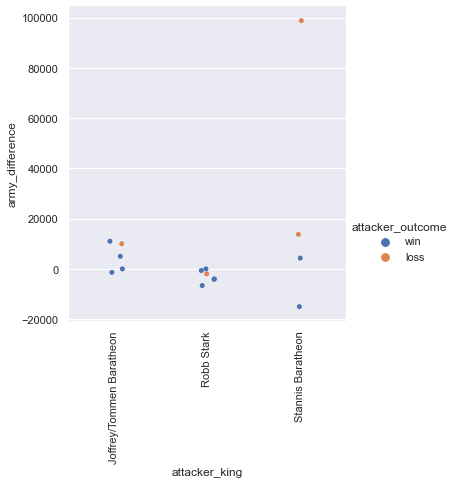

In [71]:
plt.figure()
sns.catplot(data=battles_army, x='attacker_king', y='army_difference', hue='attacker_outcome')
plt.xticks(rotation=90)
plt.show()

There is no correlation between army size and the outcome

## Predicting Death of Characters

We first read the features of the characters and merge this with death data

In [73]:
character_data = pd.read_csv('character-predictions.csv')

In [82]:
char_death = character_data.merge(death_data, left_on='name', right_on='Name')

In [137]:
char_death_dropped = char_death.drop(['S.No', 'pred', 'alive', 'plod', 'name', 'title', 'male',
        'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir', 'age',
        'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
        'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
        'boolDeadRelations', 'isAlive', 'Name', 'Death Year', 'Book of Death', 'Death Chapter', 'Book Intro Chapter',
       ], 1)

char_death_dropped

,actual,culture,house,isMarried,isNoble,numDeadRelations,isPopular,popularity,Allegiances,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,1,Rivermen,House Frey,1,1,1,1,0.896321,None,1,1,1,0,1,0,0
1,1,Dornish,House Santagar,1,1,0,0,0.043478,Martell,0,1,0,0,0,1,0
2,0,NaN,NaN,0,1,0,0,0.006689,Stark,1,0,0,0,1,0,0
3,0,NaN,Night's Watch,0,0,0,0,0.163880,Night's Watch,1,0,1,0,0,0,0
4,1,NaN,NaN,0,0,0,0,0.003344,None,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,NaN,NaN,0,0,0,0,0.046823,Lannister,1,0,0,1,1,0,0
846,1,NaN,R'hllor,0,1,0,0,0.123746,Greyjoy,1,0,0,0,0,0,1
847,0,Westeros,House Stark,0,0,0,1,0.351171,House Stark,1,0,1,1,0,0,0
848,0,NaN,House Bolton,0,0,0,0,0.096990,None,1,0,0,1,0,0,0


We have dropped the columns which we do not use features for our model. The machine learning models are trained with numeric values. Thus, we need to handle the missing values and transform categorical values to numerical values.

In [138]:
char_death_dropped['culture'] = char_death_dropped['culture'].fillna('NotKnown')
char_death_dropped['house'] = char_death_dropped['house'].fillna('Unknown')

In [141]:
char_death_dropped['house'].value_counts()

Unknown                          156
Night's Watch                     89
House Stark                       37
House Frey                        36
House Greyjoy                     20
                                ... 
House Dayne of High Hermitage      1
House Selmy                        1
Happy Port                         1
House Thorne                       1
Brotherhood Without Banners        1
Name: house, Length: 234, dtype: int64

In [142]:
char_death_dropped['Allegiances'] = pd.factorize(char_death_dropped['Allegiances'])[0]
char_death_dropped['culture'] = pd.factorize(char_death_dropped['culture'])[0]
char_death_dropped['house'] = pd.factorize(char_death_dropped['house'])[0]

Here, we initialize input and output variables of the model (X, y)

In [104]:
y = char_death_dropped['actual']
X = char_death_dropped.drop(columns=['actual'])

In [105]:
X

,culture,house,isMarried,isNoble,numDeadRelations,isPopular,popularity,Allegiances,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,0,0,1,1,1,1,0.896321,0,1,1,1,0,1,0,0
1,1,1,1,1,0,0,0.043478,1,0,1,0,0,0,1,0
2,2,2,0,1,0,0,0.006689,2,1,0,0,0,1,0,0
3,2,3,0,0,0,0,0.163880,3,1,0,1,0,0,0,0
4,2,2,0,0,0,0,0.003344,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,2,2,0,0,0,0,0.046823,4,1,0,0,1,1,0,0
846,2,182,0,1,0,0,0.123746,10,1,0,0,0,0,0,1
847,16,7,0,0,0,1,0.351171,9,1,0,1,1,0,0,0
848,2,24,0,0,0,0,0.096990,0,1,0,0,1,0,0,0


In [106]:
y

0      1
1      1
2      0
3      0
4      1
      ..
845    0
846    1
847    0
848    0
849    1
Name: actual, Length: 850, dtype: int64

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

<AxesSubplot:xlabel='Feature_value', ylabel='Feature_name'>

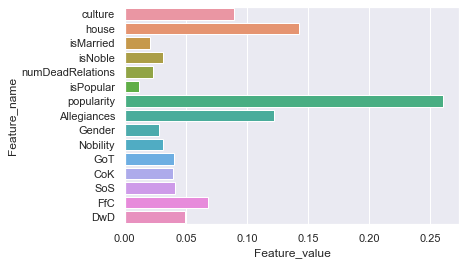

In [108]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).rename_axis('Feature_name').reset_index(name='Feature_value')
sns.barplot(data=feature_importances, x='Feature_value', y='Feature_name')

The figure indicates that the popularity is the most important feature. The Allegiances, house and culture follows that.

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7529411764705882

In [121]:
y_test.index

Int64Index([568, 648, 262, 324,  59, 342, 431, 663, 687, 804,
            ...
            601, 332, 237, 152, 247, 292, 775,  25, 356, 104],
           dtype='int64', length=170)

In [134]:
characters_test = char_death.loc[y_test.index]  
characters_test['our_predictions'] = y_pred
characters_test['correct_prediction'] = characters_test['our_predictions'] == characters_test['actual']
characters_test[['name', 'actual', 'our_predictions', 'correct_prediction']]

,name,actual,our_predictions,correct_prediction
568,Marillion,0,1,False
648,Brynden Rivers,0,1,False
262,Morrec,0,0,True
324,Cersei Frey,1,1,True
59,Squirrel,0,0,True
...,...,...,...,...
292,Quellon Humble,1,1,True
775,Tormund,1,1,True
25,Margaery Tyrell,1,1,True
356,Forley Prester,1,1,True


# References 
* https://medium.com/@omkar.sunthankar/exploring-game-of-thrones-battles-and-predicting-the-fate-of-the-characters-using-machine-1fc965dc6acb
* https://www.kaggle.com/mylesoneill/game-of-thrones    
 